In [ ]:
import pandas as pd
from datetime import datetime

In [ ]:
#Reading Tesla Stocks from yahoo
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
df_tesla = pdr.get_data_yahoo(['TSLA'])

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#Reading Tesla Stocks from yahoo
df_tesla = pdr.get_data_yahoo(['TSLA'])

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
df_tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-12,177.770004,179.429993,172.410004,177.539993,177.539993,87391700
2024-03-13,173.050003,176.050003,169.149994,169.479996,169.479996,106524500
2024-03-14,167.770004,171.169998,160.509995,162.500000,162.500000,126325700
2024-03-15,163.160004,165.179993,160.759995,163.570007,163.570007,96971900
2024-03-18,170.020004,174.720001,165.899994,173.800003,173.800003,107945600


<Axes: xlabel='Date'>

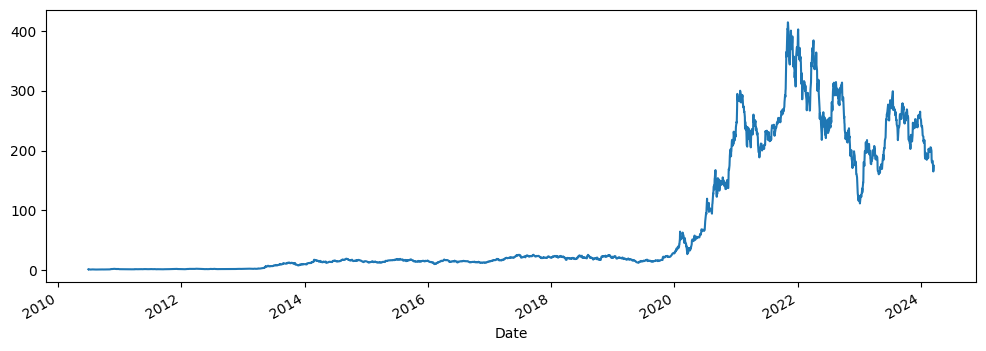

In [ ]:
df_tesla['High'].plot(figsize = (12,4))

**Observation:**
The stocks data has been started to grow around 2020

<Axes: xlabel='Date'>

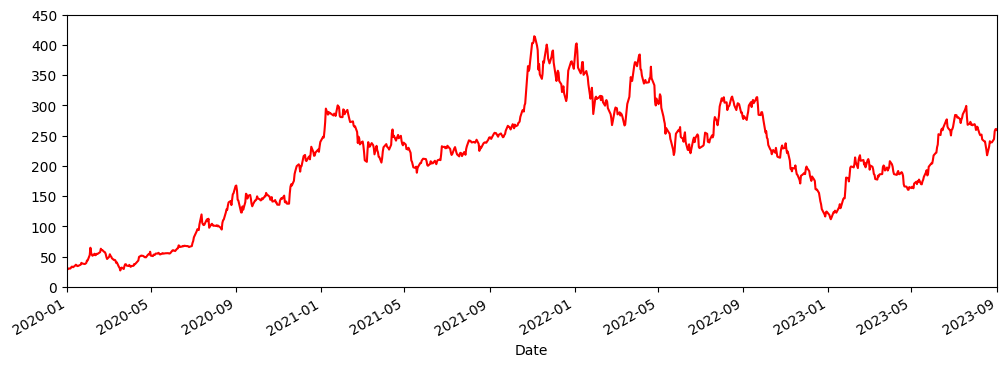

In [ ]:
#zooming to certain section
df_tesla['High'].plot(xlim = ['2020-01-01','2023-09-01'], ylim = [0,450], figsize = (12,4), color = 'red')

In [ ]:
df = df_tesla['2020-01-01':'2023-09-01']
df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24',
               '2023-08-25', '2023-08-28', '2023-08-29', '2023-08-30',
               '2023-08-31', '2023-09-01'],
              dtype='datetime64[ns]', name='Date', length=924, freq=None)

In [ ]:
df.Open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2023-08-28    242.580002
2023-08-29    238.580002
2023-08-30    254.199997
2023-08-31    255.979996
2023-09-01    257.260010
Name: Open, Length: 924, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

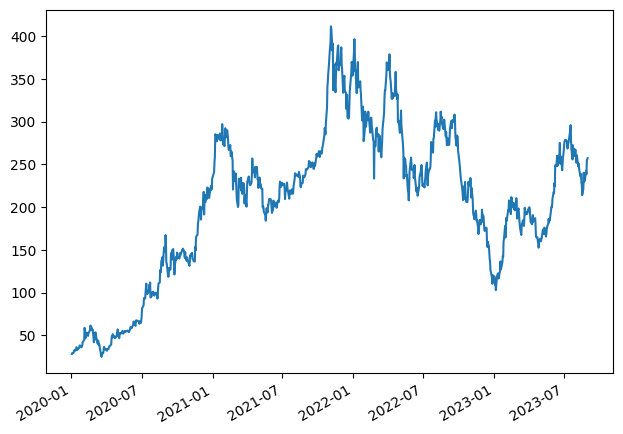

In [ ]:
figure,axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(df.index, df.Open)

In [ ]:
df_tesla = df_tesla.reset_index()

In [ ]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3453 non-null   datetime64[ns]
 1   Open       3453 non-null   float64       
 2   High       3453 non-null   float64       
 3   Low        3453 non-null   float64       
 4   Close      3453 non-null   float64       
 5   Adj Close  3453 non-null   float64       
 6   Volume     3453 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 189.0 KB


In [ ]:
df_tesla = df_tesla.set_index('Date')
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


# Time Resampling

In [ ]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
#Accessing the statistics of each column annually
df_tesla.resample('A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-31,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-31,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


<Axes: xlabel='Date'>

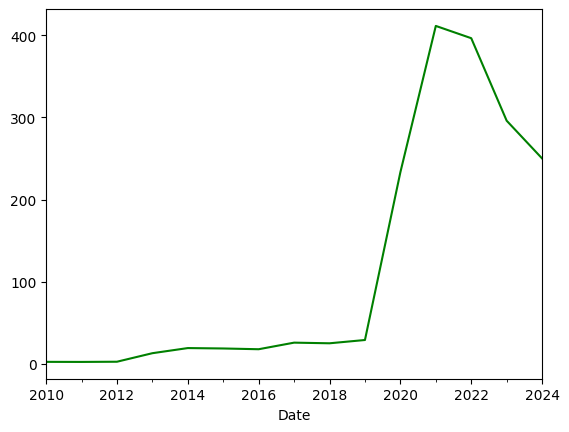

In [ ]:
#Rule A is year end frequency
df_tesla.resample(rule = 'A').max()['Open'].plot(color = 'green')

<Axes: xlabel='Date'>

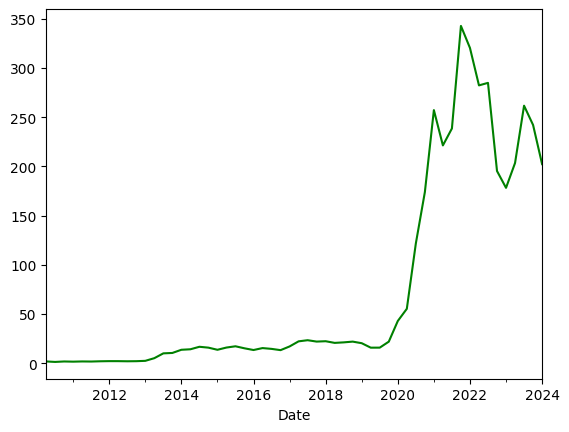

In [ ]:
#Rule QS is quater start frequency
df_tesla.resample(rule = 'QS').mean()['High'].plot(color = 'green')

<Axes: xlabel='Date'>

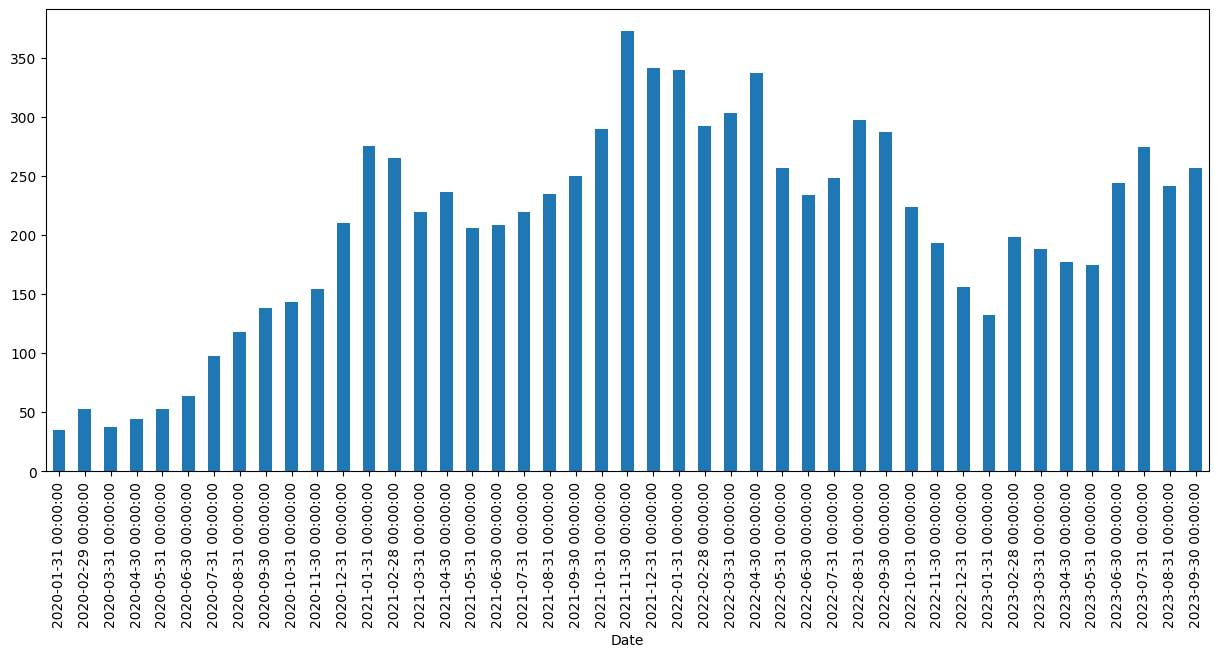

In [ ]:
df['Open'].resample(rule = 'M').mean().plot(kind = 'bar',figsize = (15,6))

# Rolling(SMA) & Expanding(CMA)

In [ ]:
df['High']

Date
2020-01-02     28.713333
2020-01-03     30.266666
2020-01-06     30.104000
2020-01-07     31.441999
2020-01-08     33.232666
                 ...    
2023-08-28    244.380005
2023-08-29    257.480011
2023-08-30    260.510010
2023-08-31    261.179993
2023-09-01    259.079987
Name: High, Length: 924, dtype: float64

In [ ]:
df['High'].rolling(5)

Rolling [window=5,center=False,axis=0,method=single]

In [ ]:
df['High'].rolling(5).mean().head(6)

Date
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
2020-01-08    30.751733
2020-01-09    31.659733
Name: High, dtype: float64

In [ ]:
df['High'].iloc[0:5].mean()

30.751733016967773

In [ ]:
df['High'].iloc[1:6].mean()

31.65973320007324

In [ ]:
df["Open: 30 days rolling"] = df['Open'].rolling(30).mean()
df.head()

<ipython-input-152-0c2a50b01936>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Open: 30 days rolling"] = df['Open'].rolling(30).mean()


,Open,High,Low,Close,Adj Close,Volume,Open: 30 days rolling
Date,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,NaN
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,NaN
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,NaN
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,NaN
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,NaN


<Axes: xlabel='Date'>

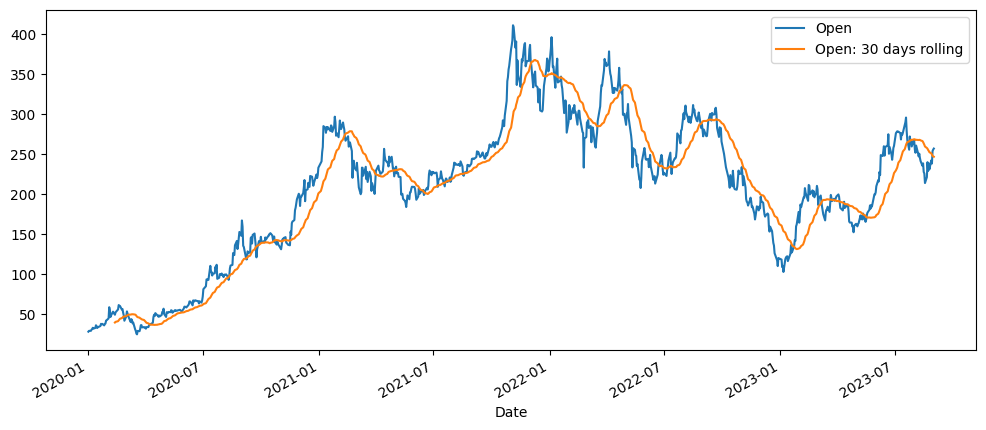

In [ ]:
df[["Open","Open: 30 days rolling"]].plot(figsize=(12,5))